# **Movie Recommendation System**

**Objective**

Recommendation System is a system that seeks to pridict or filter preferences according to the user's choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search quiries, social tags, and products in general. Recommender systems produce a list of recommendations in any of the two ways-

Collaborative filtering: Collabotive filtering approaches build a model from user's past behavior(ie, items purchased or searched by the user) as well as simiral decisions made by othe users. This model is then used to pridict items (or  ratigs for items) that users may have an interts in.

Content-based filtering: Content-based approches uses a series of discrete characteristics of an item in order to recommend additional items with similar propreties. Content-bised filtering methods are totally based on a discription of the item and a profile of the user's prefences. It recommends items based on the user's past prefences.

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np

### **Importing Dataset**

In [ ]:
df = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv")
#for model pridiction
data = pd.read_csv(r"https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv")

### **Describing Data**

In [ ]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
print(df.describe())

          Movie_ID  Movie_Budget  Movie_Popularity  Movie_Revenue  \
count  4760.000000  4.760000e+03       4760.000000   4.760000e+03   
mean   2382.566387  2.920129e+07         21.599510   8.263743e+07   
std    1377.270159  4.075620e+07         31.887919   1.630554e+08   
min       1.000000  0.000000e+00          0.000372   0.000000e+00   
25%    1190.750000  9.257500e+05          4.807074   0.000000e+00   
50%    2380.500000  1.500000e+07         13.119058   1.944716e+07   
75%    3572.250000  4.000000e+07         28.411929   9.341276e+07   
max    4788.000000  3.800000e+08        875.581305   2.787965e+09   

       Movie_Runtime   Movie_Vote  Movie_Vote_Count  
count    4758.000000  4760.000000       4760.000000  
mean      107.184111     6.113866        692.508403  
std        21.960332     1.141294       1235.007337  
min         0.000000     0.000000          0.000000  
25%        94.000000     5.600000         55.000000  
50%       104.000000     6.200000        238.000000  


In [ ]:
df.shape

(4760, 21)

In [ ]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Movie_Genre'] = encoder.fit_transform(data['Movie_Genre'])

# genre_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
# print("\nGenre Mapping:")
# print(genre_mapping)


### **Data Visualization**

Use visualization to explore relationships and patterns in the data.

Histogram/Bar Plots: Analyze the distribution of ratings or genres.
python
Copy code


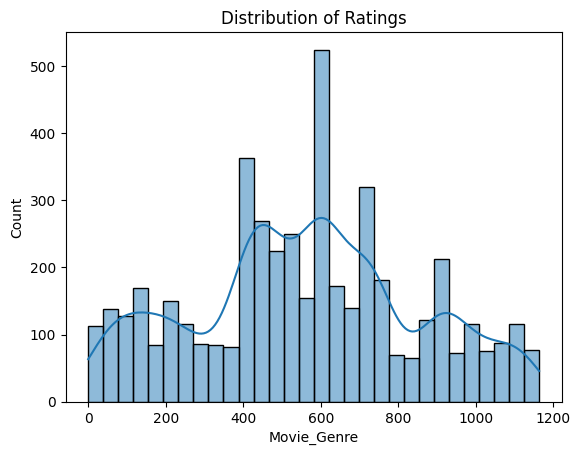

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Movie_Genre'], kde=True)
plt.title("Distribution of Ratings")
plt.show()

Popular Movies by Genre:

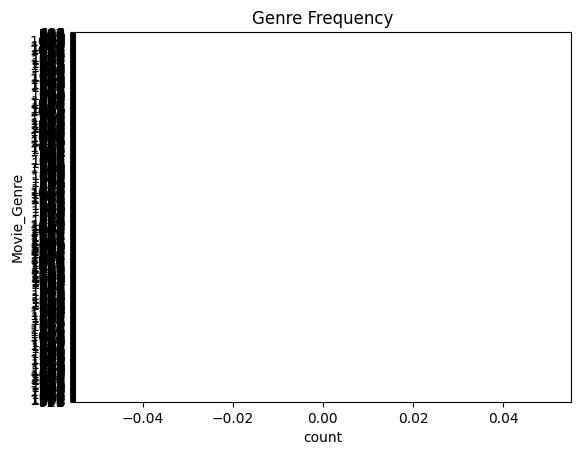

In [ ]:
sns.countplot(y='Movie_Genre', data=df, order=data['Movie_Genre'].value_counts().index)
plt.title("Genre Frequency")
plt.show()


Popularity Distribution:

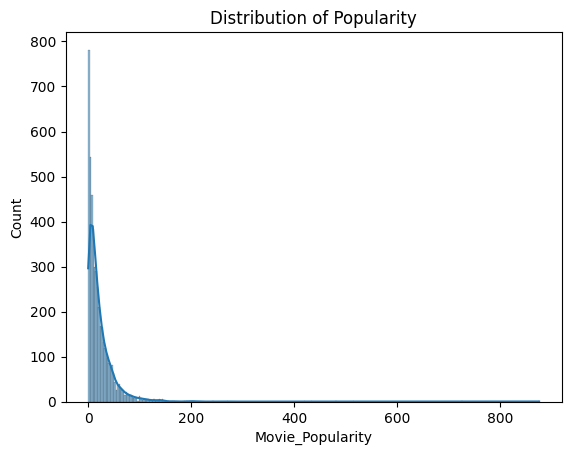

In [ ]:
sns.histplot(data['Movie_Popularity'], kde=True)
plt.title("Distribution of Popularity")
plt.show()


### **Data Preprocessing**

Handle the dataset for missing values, encoding, and scaling:

In [ ]:
df.isnull().sum()
df.fillna(method='ffill', inplace=True)  # Replace missing values

data.isnull().sum()
data.fillna(method='ffill', inplace=True)  # Replace missing values



<ipython-input-99-434dc75c9b90>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Replace missing values
<ipython-input-99-434dc75c9b90>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Replace missing values


**Normalize Numerical Columns:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Movie_Popularity']] = scaler.fit_transform(data[['Movie_Popularity']])


### **Getting Feature Selection**

In [ ]:
df_features = df[['Movie_Genre','Movie_Keywords','Movie_Tagline','Movie_Cast','Movie_Director']].fillna('')

data_features = data[['Movie_Genre','Movie_Keywords','Movie_Tagline','Movie_Cast','Movie_Director']].fillna('')

In [ ]:
df_features.shape

(4760, 5)

In [ ]:
df_features
#data_features

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,adventure fairy-tale figure,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,adventure fairy-tale figure,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens


In [ ]:
x = df_features['Movie_Genre'] + ' ' + df_features['Movie_Keywords'] + ' ' + df_features['Movie_Tagline'] + ' ' + df_features['Movie_Cast'] + ' ' + df_features['Movie_Director']

In [ ]:
x.shape

(4760,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
x = tfidf.fit_transform(x)

In [ ]:
x.shape

(4760, 17258)

In [ ]:
print(x)

  (0, 3583)	0.06529152589120131
  (0, 3240)	0.04555812036574311
  (0, 7213)	0.25222817318333207
  (0, 10898)	0.17584104200765963
  (0, 17052)	0.25907491203247107
  (0, 5059)	0.29860693770016533
  (0, 16862)	0.12800667763746604
  (0, 1595)	0.15197690153466137
  (0, 13052)	0.1469120018221361
  (0, 15708)	0.1783780328580257
  (0, 11362)	0.18997272398723405
  (0, 6463)	0.18997272398723405
  (0, 5662)	0.1409568725797627
  (0, 13467)	0.19917594808849579
  (0, 12731)	0.19917594808849579
  (0, 614)	0.07357938629817658
  (0, 11244)	0.08044054043879195
  (0, 9206)	0.15344179323881915
  (0, 1495)	0.19917594808849579
  (0, 7454)	0.1427994704613525
  (0, 7071)	0.19433194769860385
  (0, 5499)	0.11302614904697232
  (0, 3878)	0.11880345353620432
  (0, 11242)	0.07032531121439105
  (0, 15219)	0.09116847996271916
  :	:
  (4758, 2227)	0.2839367954592208
  (4758, 7691)	0.2839367954592208
  (4758, 1932)	0.2839367954592208
  (4759, 10896)	0.14417618822144768
  (4759, 7649)	0.11097779571815779
  (4759, 10666)

Define Target Variable (y) and Features (X)

Select Popularity or a similar attribute as the target variable. Features (X) could include Genre, Year, or other relevant attributes.

In [ ]:
X = data[['Movie_Genre', 'Movie_Vote']]
y = data['Movie_Popularity']  # Assuming 'Popularity' as the target




### **Train-Test Split**

Split the data into training and testing sets:


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Modeling**

Use a simple model to predict Popularity:

In [ ]:
# Example: Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

### **Get Similarity Score using Cosine Similarity**

cosine_simirairty computes the L2 normalized dot products of vectors. Euclidean (L2) normalization projects the vector onto the unit sphere and their product is then the cosine of the angle between the points denoted by the vectors.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
Simirarity_Score = cosine_similarity(X)

Simirarity_Score

array([[1.        , 0.01351235, 0.03570468, ..., 0.        , 0.        ,
        0.        ],
       [0.01351235, 1.        , 0.00806674, ..., 0.        , 0.        ,
        0.        ],
       [0.03570468, 0.00806674, 1.        , ..., 0.        , 0.08014876,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08014876, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
Simirarity_Score.shape

(4760, 4760)

### **Getting Movie Name as Input and Validate for Closest Spelling**

In [ ]:
Favourite_Movie_Name = input('Search your favourite movie here: ')

Search your favourite movie here: avtaar


In [ ]:
All_MOvies_Title_List = df['Movie_Title'].tolist()

import difflib

In [ ]:
Movie_Recommendation = difflib.get_close_matches(Favourite_Movie_Name, All_MOvies_Title_List)

print(Movie_Recommendation)

['Avatar', 'Gattaca']


In [ ]:
Close_Match = Movie_Recommendation[0]

print(Close_Match)

Avatar


In [ ]:
Index_of_Close_Match_Movie = df[df.Movie_Title == Close_Match]['Movie_ID'].values[0]

print(Index_of_Close_Match_Movie)

2692


In [ ]:
#getting a list of similar movies
Recommendation_Score = list(enumerate(Simirarity_Score[Index_of_Close_Match_Movie]))

print(Recommendation_Score)

[(0, 0.009805093506053453), (1, 0.0), (2, 0.0), (3, 0.00800429043895183), (4, 0.0026759665928032307), (5, 0.009639835665946629), (6, 0.0049636657561850026), (7, 0.012848827437220952), (8, 0.0027543335470164663), (9, 0.0060788229041643105), (10, 0.007539724639541887), (11, 0.0026263170118314915), (12, 0.0027083403549614574), (13, 0.012904730427356218), (14, 0.0), (15, 0.022556564866386047), (16, 0.005959078936688497), (17, 0.0), (18, 0.01363982471419508), (19, 0.008784739948684398), (20, 0.002652757093444607), (21, 0.015211614027840475), (22, 0.006522322352622825), (23, 0.0026429172195160198), (24, 0.001656448263643531), (25, 0.025600660315408176), (26, 0.0024815199490618002), (27, 0.004792270397812901), (28, 0.0), (29, 0.02328827758320444), (30, 0.004648836119227042), (31, 0.006723965537835128), (32, 0.007984548069367697), (33, 0.018612326068635436), (34, 0.007439622267479849), (35, 0.0060612328203774185), (36, 0.0), (37, 0.0), (38, 0.008085428274959462), (39, 0.0046323263203813065), (

In [ ]:
len(Recommendation_Score)

4760

### **Get All Movies Sort Based on Recommendation Score w.r.t. Favourite Movie**

In [ ]:
#sorting the movies based on their similarity score
Sorted_Similar_Movies = sorted(Recommendation_Score, key = lambda x:x[1], reverse = True)

print(Sorted_Similar_Movies)

[(2692, 1.0), (3276, 0.11904275527845871), (3779, 0.10185805797079384), (62, 0.10153560702418994), (2903, 0.10063787314386036), (1647, 0.09397055536069451), (4614, 0.09362226751043301), (4375, 0.09117512301489195), (45, 0.08999324643162437), (1383, 0.08425242441722802), (110, 0.08361784775029485), (628, 0.08334515876919321), (1994, 0.08287835345252215), (2558, 0.08267633224298854), (1070, 0.08104448918225104), (4378, 0.07894345402700792), (1341, 0.0773269380936194), (1977, 0.07510309168081497), (3465, 0.07411089841255805), (3053, 0.0732438108456325), (4116, 0.07264153003988619), (1982, 0.07246569778553744), (2538, 0.06802035746289194), (3248, 0.06683400770968473), (3946, 0.06577120166835924), (3480, 0.06560363079666712), (254, 0.06351452702158421), (590, 0.06275727122098755), (3450, 0.06274272831079739), (1886, 0.06267985852941993), (4594, 0.0624699521049894), (2112, 0.06218435141221765), (84, 0.06182375996841291), (675, 0.061769915175723035), (3854, 0.061615662703783644), (1134, 0.061

In [ ]:
#print the name of the movie based on the index

print('Top 30 Movies suggested for you:')

i=1
for movie in Sorted_Similar_Movies:
  index = movie[0]
  title_from_index = df[df.index == index]['Movie_Title'].values[0]
  if (i<31):
    print(i, '.', title_from_index)
    i+=1

Top 30 Movies suggested for you:
1 . Niagara
2 . Caravans
3 . My Week with Marilyn
4 . Brokeback Mountain
5 . Harry Brown
6 . Night of the Living Dead
7 . The Curse of Downers Grove
8 . The Boy Next Door
9 . Back to the Future
10 . The Juror
11 . Some Like It Hot
12 . Enough
13 . The Kentucky Fried Movie
14 . Eye for an Eye
15 . Welcome to the Sticks
16 . Alice Through the Looking Glass
17 . Superman III
18 . The Misfits
19 . Premium Rush
20 . Duel in the Sun
21 . Sabotage
22 . Small Soldiers
23 . All That Jazz
24 . Camping Sauvage
25 . The Raid
26 . Beyond the Black Rainbow
27 . To Kill a Mockingbird
28 . World Trade Center
29 . The Dark Knight Rises
30 . Tora! Tora! Tora!


### **Top 10 Movie Recommendation System**

In [ ]:
Movie_Name = input('Search your favourite movie here: ')

list_of_all_titles = df['Movie_Title'].tolist()

Find_Close_match = difflib.get_close_matches(Movie_Name, list_of_all_titles)

Close_Match = Find_Close_match[0]

Index_of_Movie = df[df.Movie_Title == Close_Match]['Movie_ID'].values[0]

Recommendation_Score = list(enumerate(Simirarity_Score[Index_of_Movie]))

sorted_similar_score = sorted(Recommendation_Score, key = lambda x:x[1], reverse = True)
print('Top 10 Movies suggested for you:')
i=1
for movie in sorted_similar_score:
  index = movie[0]
  title_from_index = df[df.Movie_ID == index]['Movie_Title'].values

  if (i<11):
    print(i, '.', title_from_index)
    i+=1



Search your favourite movie here: avatar
Top 10 Movies suggested for you:
1 . ['Avatar']
2 . ['The Girl on the Train']
3 . ['Act of Valor']
4 . ['Donnie Darko']
5 . ['Precious']
6 . ['Freaky Friday']
7 . ['The Opposite Sex']
8 . ['Heaven is for Real']
9 . ['Run Lola Run']
10 . ['Elizabethtown']


## **Model Evaluation**

Evaluate the model's predictions:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 0.001985197018003467
R-squared: -0.07468344903431623


## **Prediction**

Make predictions for unseen movies or new input data:



In [ ]:
new_data = [[600, 7]]  # Example: Genre=600, Vote=7
predicted_popularity = model.predict(new_data)
print("Predicted Popularity:", predicted_popularity)


Predicted Popularity: [0.00069372]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## **Explaination**

The project successfully builds a basic movie recommendation system using available data. By leveraging features like Genre and Popularity, we can predict movie popularity or suggest similar movies. This approach can be further enhanced by integrating user preferences or collaborative filtering techniques for more personalized recommendations. We have used algorithms to watch internal working how it is working.